In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def display_image(image):
    pass

In [9]:
cv2.namedWindow("image", cv2.WINDOW_NORMAL)
cv2.createTrackbar("threshold", "image", 0, 255, display_image)
kid_image = cv2.imread("../day8/data/kid.jpg", cv2.IMREAD_GRAYSCALE)
while True:
    threshold = cv2.getTrackbarPos("threshold", "image")
    _, binary_img = cv2.threshold(kid_image, threshold, 255, cv2.THRESH_BINARY)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    cv2.imshow("image", binary_img)
cv2.destroyAllWindows()

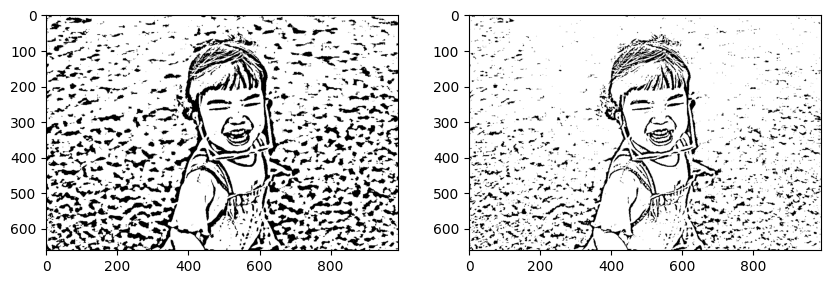

In [18]:
th1 = cv2.adaptiveThreshold(kid_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21,5)
th2 = cv2.adaptiveThreshold(kid_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21,5)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(th1, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(th2, cmap="gray")
plt.show()

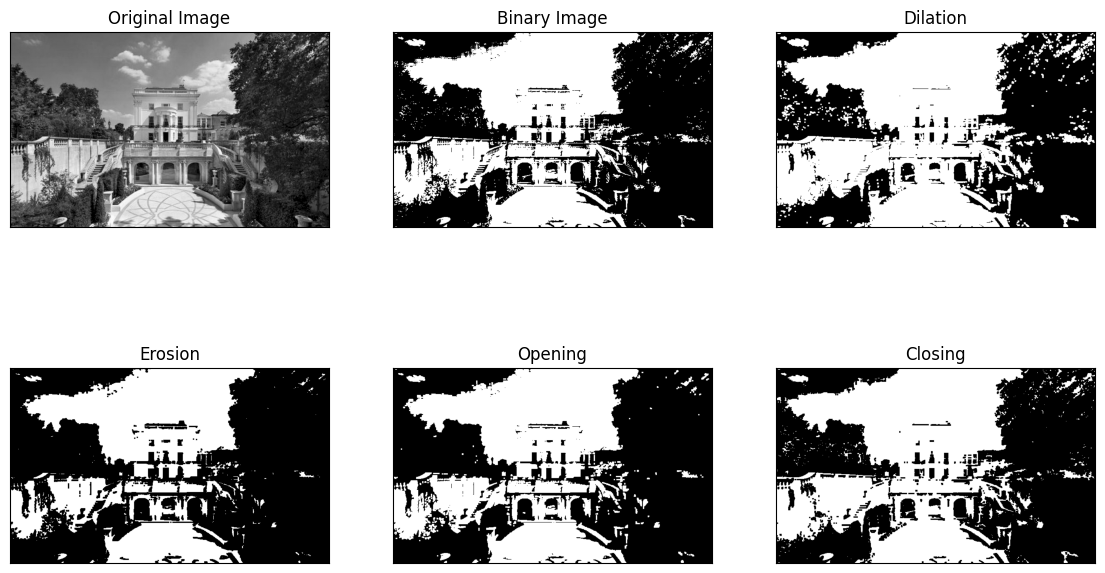

In [22]:
castle_gray = cv2.imread("../day8/data/castle.png", cv2.IMREAD_GRAYSCALE)
thresh, binary_img = cv2.threshold(castle_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = np.ones((3, 3), np.uint8)

dilation = cv2.dilate(binary_img, kernel, iterations=1)

erosion = cv2.erode(binary_img, kernel, iterations=1)

opening = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel)

closing = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel)

titles = ['Original Image', 'Binary Image', 'Dilation', 'Erosion', 'Opening', 'Closing']
images = [castle_gray, binary_img, dilation, erosion, opening, closing]
plt.figure(figsize=(14, 8))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

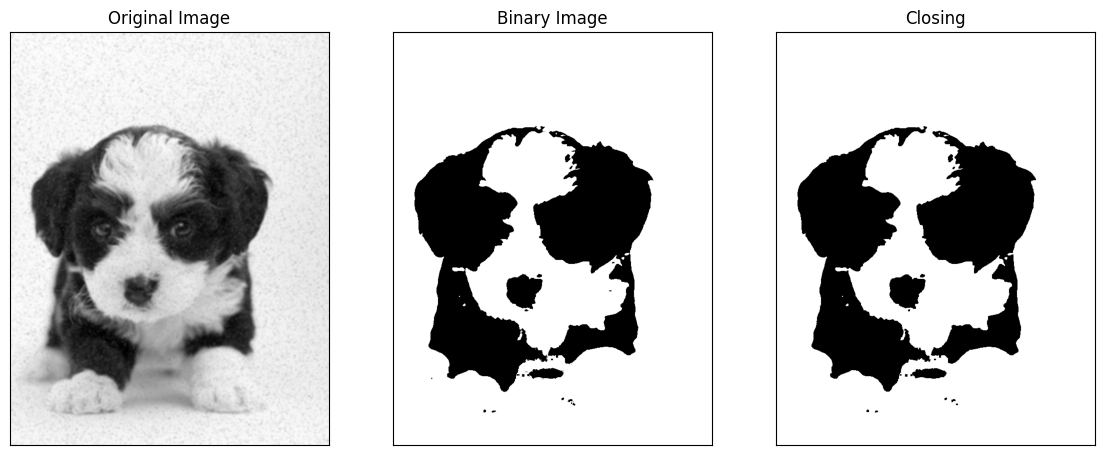

In [25]:
dog_noise = cv2.imread("../day8/data/dog-noise.jpg", cv2.IMREAD_GRAYSCALE)
dog_noise = cv2.GaussianBlur(dog_noise, (5, 5), 3)
thresh, binary_img = cv2.threshold(dog_noise, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel)
titles = ['Original Image', 'Binary Image', 'Closing']
images = [dog_noise, binary_img, closing]
plt.figure(figsize=(14, 8))
for i in range(len(images)):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [61]:
kid_image = cv2.imread("../day8/data/kid.jpg")
kid_image = cv2.GaussianBlur(kid_image, (5, 5), 3)
kid_image = cv2.cvtColor(kid_image, cv2.COLOR_BGR2HSV)
cv2.namedWindow("HSV Adjustments", cv2.WINDOW_NORMAL)
cv2.namedWindow("Result", cv2.WINDOW_NORMAL)
cv2.createTrackbar("H Min", "HSV Adjustments", 0, 179, display_image)
cv2.createTrackbar("H Max", "HSV Adjustments", 179, 179, display_image)
cv2.createTrackbar("S Min", "HSV Adjustments", 0, 255, display_image)
cv2.createTrackbar("S Max", "HSV Adjustments", 255, 255, display_image)
cv2.createTrackbar("V Min", "HSV Adjustments", 0, 255, display_image)
cv2.createTrackbar("V Max", "HSV Adjustments", 255, 255, display_image)

while True:
    h_min = cv2.getTrackbarPos("H Min", "HSV Adjustments")
    h_max = cv2.getTrackbarPos("H Max", "HSV Adjustments")
    s_min = cv2.getTrackbarPos("S Min", "HSV Adjustments")
    s_max = cv2.getTrackbarPos("S Max", "HSV Adjustments")
    v_min = cv2.getTrackbarPos("V Min", "HSV Adjustments")
    v_max = cv2.getTrackbarPos("V Max", "HSV Adjustments")

    lower_hsv = np.array([h_min, s_min, v_min])
    upper_hsv = np.array([h_max, s_max, v_max])
    mask = cv2.inRange(kid_image, lower_hsv, upper_hsv)
    result = cv2.bitwise_and(kid_image, kid_image, mask=mask)

    cv2.imshow("Result", result)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

In [29]:
kid_image = cv2.imread("../day8/data/kid.jpg")
kid_image = cv2.GaussianBlur(kid_image, (5, 5), 3)
kid_image = cv2.cvtColor(kid_image, cv2.COLOR_BGR2HSV)


In [60]:
map = cv2.imread("../day8/data/map.png",0)
# denoise = cv2.GaussianBlur(map, (5, 5), 0)
# thresh = cv2.adaptiveThreshold(denoise, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21,10)
_, th1 = cv2.threshold(map, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# kernel = np.ones((3,3), np.uint8)

kernel = np.array([[0, 1, 0], 
                   [1, 1, 1], 
                   [0, 1, 0]], np.uint8) 
# closing = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
# erosion = cv2.erode(th1, kernel, iterations=1)
cv2.imshow("Result", th1)
cv2.waitKey(0)
cv2.destroyAllWindows()